# K-Means Clustering and PCA Analysis

## David Berberena

## 6/30/2024

# Program Start

## 1. Remove any data that is not relevant to the patient’s ALS condition.

In [1]:
# I will import the Pandas library to enable the reading of the CSV file containing the ALS data we are dealing with here.

import pandas as pd

als_data = 'https://raw.githubusercontent.com/SosukeAizen5/Portfolio/main/DSC%20630%20Predictive%20Analytics/als_data.csv'

als = pd.read_csv(als_data)

# The head() function here is written to ensure the proper reading of the file.

als.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [2]:
# To immediately rule out columns that are not relevant to the patient's ALS condition, we can drop the ID and SubjectID 
# columns from the dataset using the drop() function with the axis set to 1.

als = als.drop(['ID', 'SubjectID'], axis = 1)

# The head() function here is written to ensure the proper transformation of the data.

als.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
# Following the guide of the textbook to craft a correlation matrix to then identify which features are to be considered 
# irrelevant, I will use the corr() function here to craft the matrix.

als_matrix = als.corr()

als_matrix

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
Age_mean,1.000000,-0.276195,-0.349024,-0.297121,0.053197,-0.015301,0.049054,0.057733,0.041025,0.038163,...,0.005432,-0.039712,0.080449,0.071736,0.089325,0.065092,0.036559,-0.001532,0.002561,-0.008615
Albumin_max,-0.276195,1.000000,0.780141,0.596662,0.223350,0.037438,0.113349,0.090439,0.058077,-0.072609,...,0.013677,-0.040877,-0.048029,0.080261,0.057346,0.042903,-0.064183,0.075413,-0.046885,-0.138430
Albumin_median,-0.349024,0.780141,1.000000,0.761269,-0.091822,0.059234,0.153280,0.128122,0.099099,-0.099966,...,0.007380,-0.017818,-0.069380,0.097823,0.084183,0.072317,-0.088370,0.056894,-0.042497,-0.118506
Albumin_min,-0.297121,0.596662,0.761269,1.000000,-0.369015,0.112154,0.158924,0.172940,0.188007,-0.151358,...,0.046761,0.074240,-0.086457,0.095974,0.113639,0.134409,-0.114685,0.034555,-0.001877,-0.049783
Albumin_range,0.053197,0.223350,-0.091822,-0.369015,1.000000,-0.226123,-0.142900,-0.166473,-0.188223,0.264209,...,0.030864,0.020971,0.177163,-0.086105,-0.110648,-0.124018,0.211769,-0.011823,0.038553,0.022866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
trunk_min,0.065092,0.042903,0.072317,0.134409,-0.124018,0.488530,0.590336,0.729634,0.845515,-0.576628,...,0.029731,0.059450,-0.098606,0.633160,0.791262,1.000000,-0.620503,-0.067544,-0.013682,0.020322
trunk_range,0.036559,-0.064183,-0.088370,-0.114685,0.211769,-0.686407,-0.022388,-0.252393,-0.549288,0.815212,...,-0.008379,-0.007871,0.173634,0.082453,-0.209821,-0.620503,1.000000,0.013725,0.051023,0.021281
Urine.Ph_max,-0.001532,0.075413,0.056894,0.034555,-0.011823,-0.037779,-0.034254,-0.072189,-0.089458,0.043252,...,-0.052230,-0.058276,0.005643,-0.031953,-0.046946,-0.067544,0.013725,1.000000,0.487953,0.073412
Urine.Ph_median,0.002561,-0.046885,-0.042497,-0.001877,0.038553,-0.064897,-0.031396,-0.038370,-0.024922,0.079291,...,0.040815,0.109544,0.021791,-0.041352,-0.023227,-0.013682,0.051023,0.487953,1.000000,0.525513


In [4]:
# Now I can state my threshold here. To find matching pairs of correlated features, I will craft an empty list and use it as
# a requirement for the nested for loop I have written to have each feature pair up with another feature and evaluate the 
# correlation coefficients. Should the pair of features have a correlation that is above the 0.9 threshold, that pair will 
# be appended to the empty list so I may print all of the highly correlated feature pairs. 

threshold = 0.9

high_corr_pairs = []
for variable_count in range(len(als_matrix.columns)):
    for feature in range(variable_count):
        if abs(als_matrix.iloc[variable_count, feature]) > threshold:
            high_corr_pairs.append((als_matrix.columns[variable_count], als_matrix.columns[feature]))

print("Feature pairs with a correlation coefficient above +/-0.9:")
print(high_corr_pairs)

Feature pairs with a correlation coefficient above +/-0.9:
[('Hematocrit_median', 'Hematocrit_max'), ('Hematocrit_min', 'Hematocrit_max'), ('Hematocrit_min', 'Hematocrit_median'), ('mouth_median', 'mouth_max'), ('Platelets_min', 'Platelets_median')]


In [5]:
# With the list of feature pairs above, I can manually decide which feature stays and which feature gets dropped. Out of 
# these four pairs of features, I will be keeping the median variables, whcih actually causes me to drop a feature as both 
# the 'Hematocrit_min' and 'Hematocrit_max' feature are both highly correlated to the median version of this variable. I 
# will drop these redundant features here with drop().

als = als.drop(['Hematocrit_min', 'Hematocrit_max', 'mouth_max', 'Platelets_min'], axis = 1)

# The head() function here is written to ensure the proper transformation of the data.

als.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


## 2. Apply a standard scalar to the data.

In [6]:
# To apply a standard scalar, I need to import the StandardScaler() function from the preprocessing library of Sci-kitlearn.

from sklearn.preprocessing import StandardScaler

als_scaled = StandardScaler().fit_transform(als)

# I am using the print() function to check whether the data has been scaled correctly.

print(als_scaled)

[[ 0.91713698  3.08941722 -1.30078105 ... -0.88037551  0.46305355
   1.86853157]
 [-0.57487867 -0.62201561 -1.11240084 ...  0.1926645  -1.13720768
  -0.41915124]
 [-1.45253494  0.92441474  1.14816173 ... -0.88037551 -1.13720768
  -0.41915124]
 ...
 [-0.6626443  -0.31272954  0.01788044 ...  2.33874452  0.46305355
  -0.41915124]
 [-1.54030057  0.61512867  0.01788044 ... -0.88037551 -1.13720768
  -0.41915124]
 [-0.57487867  0.3058426   0.39464087 ... -1.95341552 -1.13720768
  -0.41915124]]


## 3. Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

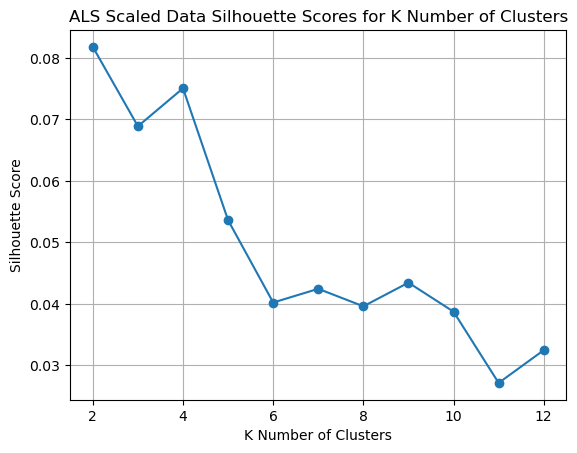

In [7]:
# To work with the necessary functions, I will be importing Matplotlib (to plot the chart), KMeans() from Sci-kitlearn's 
# cluster module, and silhouette_score() from the metrics module of Sci-kitlearn. Warnings will also be imported to have the
# potential model generation warnings be ignored.

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings("ignore")

# To find the silhouette scores for multiple values for k, I will create another empty list here to capture those silhouette
# scores. After naming the values for k I wish to look at (I have chosen 1 through 12), I have written a for loop that fits 
# a K-means classifier model with the value of k, retrieves predictions from the model using the fit_predict(), computes the
# silhouette score using the silhouette_score() function with the scaled data and the predictions, and appends the score to 
# the empty list. This for loop will continue until all values of k have been iterated through. The random_state argument 
# for each KMeans model crafted ensures reproducibility.

k_cluster_options = range(2, 13)

silhouette_scores = []

for k in k_cluster_options:
    als_kmeans = KMeans(n_clusters = k, random_state = 123)
    cluster_labels = als_kmeans.fit_predict(als_scaled)
    silhouette_cluster_score = silhouette_score(als_scaled, cluster_labels)
    silhouette_scores.append(silhouette_cluster_score)

# With the scores now computed for each value of k, I can now plot them together with their respective k values using 
# Matplotlib's plot() function. I have chosen to add the marker argument with it being set to 'o' and the grid() function
# set to True so the plot can be read much easier.

plt.plot(k_cluster_options, silhouette_scores, marker = 'o')
plt.xlabel('K Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('ALS Scaled Data Silhouette Scores for K Number of Clusters')
plt.grid(True)
plt.show()

## 4. Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

Based on the plot created above highlighting the silhouette scores for each value of k from 2 through 12, I believe the optimal number for k in this scenario is 2. This is because the silhouette score is at its peak at this value for k, and typically the highest silhouette score is what marks the optimal number for k in a k-means clustering model. The second choice would be 4, yet this value for k only has the second highest silhouette score. Every value for k after 4 trends downward regarding the silhouette score attached to them, something suboptimal for the k-means model.

## 5. Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [8]:
# Fitting the K-means model is done the same way it was done in the third prompt, yet there is no predictions needed for 
# this task. I will print the model to show one has been crafted.

optimal_als_kmeans = KMeans(n_clusters = 2, random_state = 123)

optimal_als_kmeans.fit(als_scaled)

optimal_als_kmeans

KMeans(n_clusters=2, random_state=123)

## 6. Fit a PCA transformation with two features to the scaled data.

In [9]:
# Importing the PCA() function from the decomposition module of Sci-kitlearn allows us access to use it.

from sklearn.decomposition import PCA

# To make certain that only two features are being handled by the PCA() function, we need to set the n_components argument 
# to 2. Fitting the scaled ALS data to the PCA model is done with the fit_transform() function. I have printed the PCA 
# transformed data to show that it was done correctly. 

pca_model = PCA(n_components = 2)

als_pca_scaled = pca_model.fit_transform(als_scaled)

als_pca_scaled

array([[-1.75756324,  1.57670518],
       [-1.66593978, -1.08482245],
       [ 1.64221871, -3.54898839],
       ...,
       [-0.34783568, -0.24112278],
       [-0.18257294,  1.35735986],
       [ 1.3484174 ,  4.35015808]])

## 7. Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

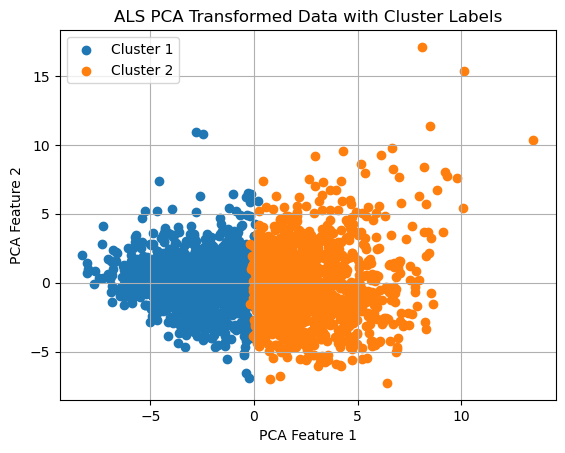

In [10]:
# To craft the scatter plot of the PCA ALS data, I chose to convert the PCA scaled ALS data into its own DataFrame to have
# it work better for visualization purposes. I also added the cluster labels from the K-means model to the DataFrame as a
# separate column so the PCA data points can be plotted by their cluster label. I had to create a for loop to correctly plot
# the data by their cluster using the unique() function. I included a legend that defined the data points by their cluster 
# number as determined by the label argument I added during the plotting in the for loop as well as a grid for easy 
# visibility/readability. 

als_pca_cluster_data = pd.DataFrame(als_pca_scaled, columns = ['PCA_feature_1', 'PCA_feature_2'])

als_pca_cluster_data['Cluster_number'] = optimal_als_kmeans.labels_

for cluster in als_pca_cluster_data['Cluster_number'].unique():
    plt.scatter(als_pca_cluster_data[als_pca_cluster_data['Cluster_number'] == cluster]['PCA_feature_1'],
                als_pca_cluster_data[als_pca_cluster_data['Cluster_number'] == cluster]['PCA_feature_2'],
                label = f'Cluster {cluster + 1}')

plt.title('ALS PCA Transformed Data with Cluster Labels')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## 8. Summarize your results and make a conclusion.

The resulting scatter plot shows that there are two clusters as the silhouette scores suggested, yet they are barely discernible from one another if the different color choices were not there to show the divide. There are some points that overlap in the middle of where the two clusters meet as well as a few outlier observations in both clusters, making it hard to discern the optimal number of clusters is two should the graph be in one color. The features that were kept in the dataset after discarding the irrelevant and redundant variables did well to distinguish the two clusters from each other. The only thing I see as an issue is that we do not know which features were significant in creating which clusters, and in terms of the ALS disease, we cannot hope to understand what characteristics are prevalent in each cluster without further information. It looks to me that one cluster of data may show those who do not have ALS while the other cluster denotes individuals who do, but we cannot know what feature values are influencing the shaky divide in cluster just by looking at the analysis we have done. 